#in-depth analysis of financial time series data, offering insights into trends, seasonality, stationarity, and autocorrelation

##Data Loading and Preprocessing:

*  It imports essential Python libraries, such as pandas, numpy, matplotlib, seaborn, and statsmodels, for data manipulation and analysis.
The code loads a financial dataset from a CSV file named 'Price.csv' using the Pandas library.
Data Exploration:

*  The code creates a copy of the dataset ('df_c') and extracts the 'year' and 'week' information from the 'date' column using Pandas datetime functions.
Unnecessary columns ('dax', 'ftse', 'nikkei') are removed from 'df_c' to focus on the 'spx' data.
Data Visualization:

*  The script utilizes the Seaborn library to plot line graphs, showing the trends in the 'spx' data over the years and weeks.
It also generates a distribution plot for 'spx' data to visualize its statistical distribution.
Time Series Analysis:

*  The code explores the time series data further by resampling it to business day frequency ('B') and calculating the mean values.
Missing values in 'spx', 'dax', 'ftse', and 'nikkei' columns are filled using forward and backward filling methods.
The Augmented Dickey-Fuller test is applied to check the stationarity of the 'nikkei' data, and the results are displayed along with a line plot.
White Noise Analysis:

*  White noise data is read from an Excel file ('wn.xlsx').
The Augmented Dickey-Fuller test is applied to assess the stationarity of the 'wn' data, and the results are shown along with a line plot.
Seasonal Decomposition:

*  The code performs seasonal decomposition on the 'ftse' data using both additive and multiplicative models. It visualizes the decomposed components, including trend, seasonal, and residual, for each model.
Autocorrelation Analysis:

*  Autocorrelation function (ACF) and partial autocorrelation function (PACF) plots are generated for 'ftse' and 'wn' data. These plots help in understanding the time dependencies and lags in the data.
This code is designed for in-depth analysis of financial time series data, offering insights into trends, seasonality, stationarity, and autocorrelation.

##Aboute Dataset

*  This database, which contains 6,269 rows and 5 columns, contains information on several stock market indices from 1994 to 2018. The different data columns are as follows:

*  date: This column displays different dates and acts as a time column in the database.

*  spx: This column is related to the S&P 500 index. This index is one of the most important stock market indices in the United States and the world.

*  dax: This column is related to the DAX index, which is the main index of the Frankfurt Stock Exchange in Germany.

*  ftse: This column is related to the FTSE 100 index, which represents the London Stock Exchange.

*  Nikkei: This column is related to the Nikkei 225 index, which is the main index of the Tokyo Stock Exchange in Japan.

*  Overall, this dataset provides information about the values of these indices in the capital market over time. This type of data is usually used to analyze and predict financial and economic market trends.

In [53]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as sts
import statsmodels.tsa.seasonal as seasonal
import statsmodels.graphics.tsaplots as sgt
import scipy.stats as st
import pylab

In [54]:
# Read the data from '/content/Price.csv' into a DataFrame
df = pd.read_csv('/content/Price.csv')
df

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [55]:
# Create a copy of the DataFrame
df_c = df.copy()

In [56]:
# Extract year and week from the 'date' column
df_c['year'] = pd.to_datetime(df_c['date']).dt.year
df_c['week'] = pd.to_datetime(df_c['date']).dt.week

<ipython-input-56-634d66a700ce>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_c['year'] = pd.to_datetime(df_c['date']).dt.year
<ipython-input-56-634d66a700ce>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_c['week'] = pd.to_datetime(df_c['date']).dt.week
<ipython-input-56-634d66a700ce>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_c['week'] = pd.to_datetime(df_c['date']).dt.week


In [57]:
# Drop unnecessary columns 'dax', 'ftse', and 'nikkei'
df_c.drop(['dax', 'ftse', 'nikkei'], axis=1, inplace=True)

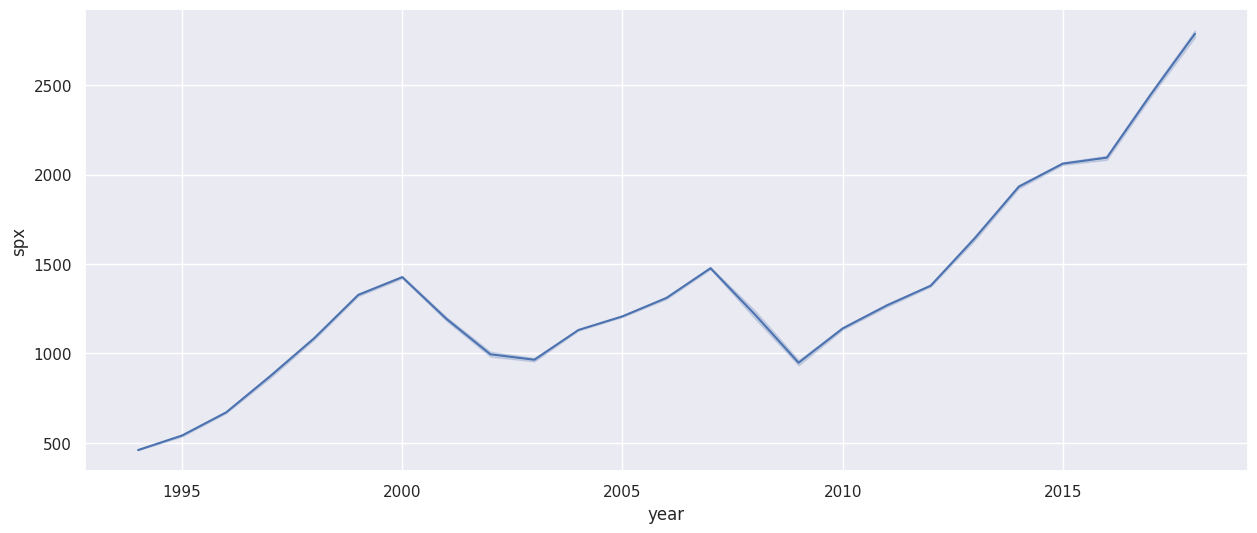

In [58]:
# Plot a line graph of 'spx' data by year
sns.lineplot(x='year', y='spx', data=df_c)
sns.set(rc={'figure.figsize': (15, 6)})
plt.show()

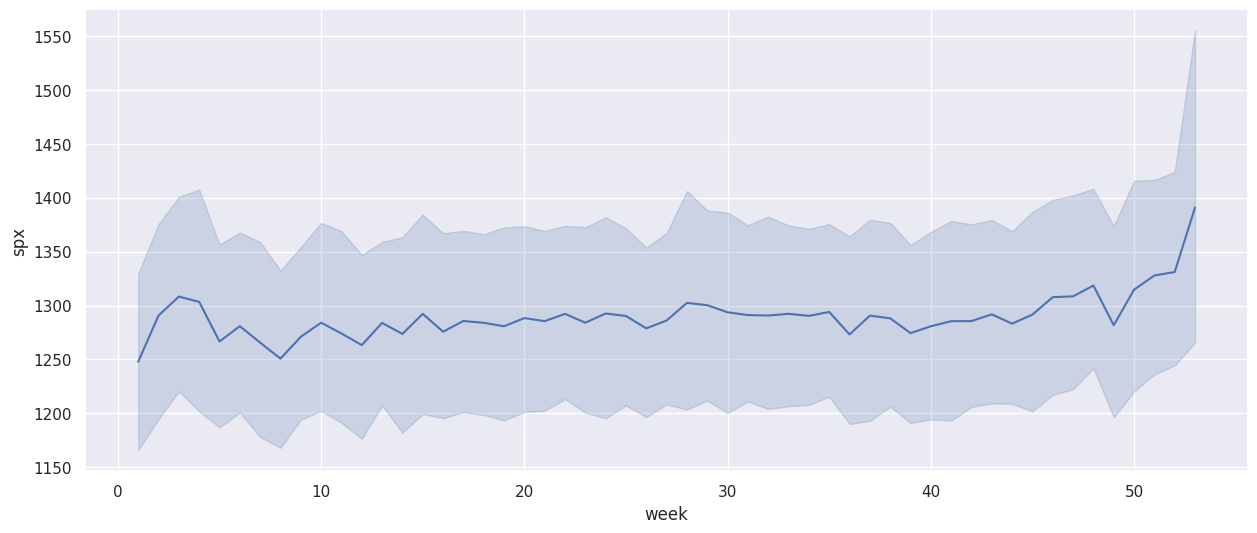

In [59]:
# Plot a line graph of 'spx' data by week
sns.lineplot(x='week', y='spx', data=df_c)
sns.set(rc={'figure.figsize': (15, 6)})
plt.show()

<ipython-input-60-40887ef9975d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_c['spx'])


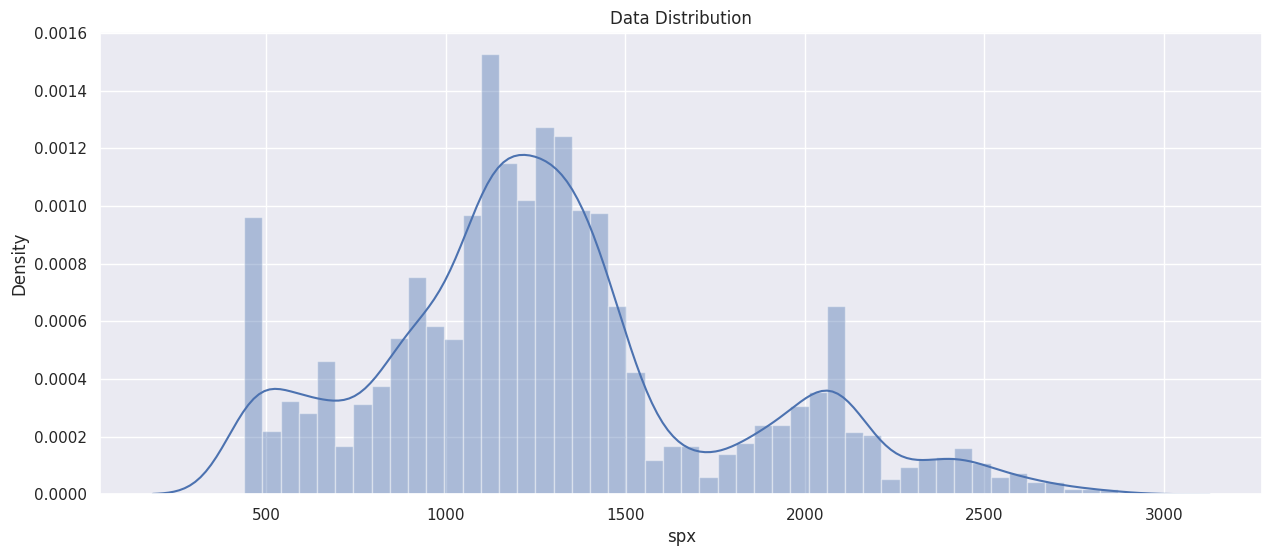

In [60]:
# Plot a distribution plot for 'spx' data
sns.distplot(df_c['spx'])
plt.title("Data Distribution")
plt.show()

In [61]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


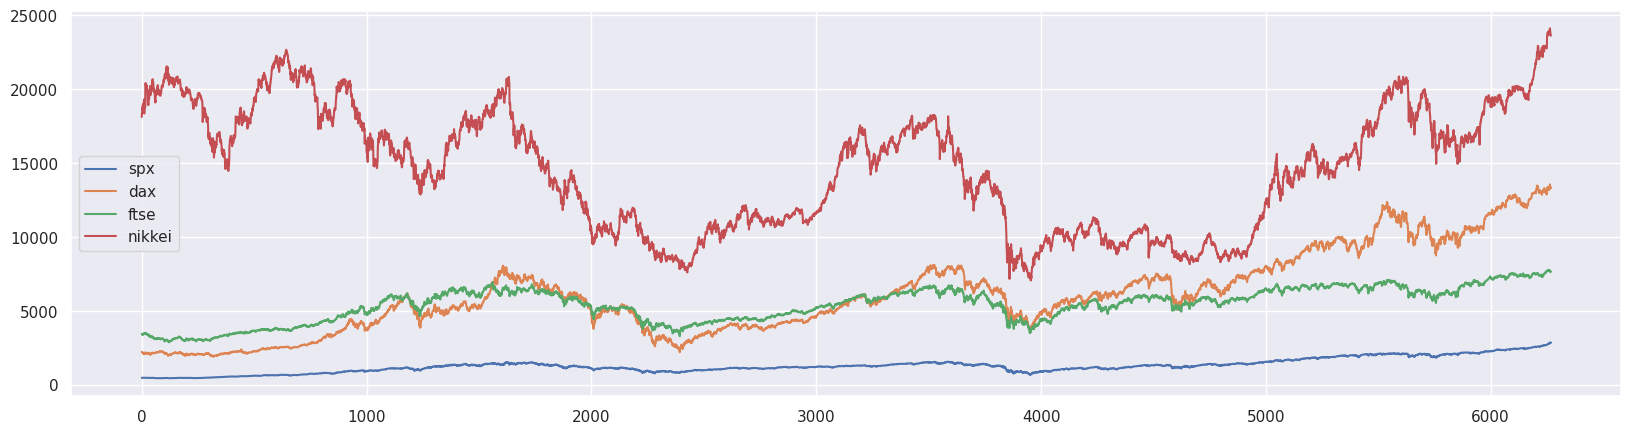

In [62]:
# Plot the entire DataFrame
df.plot(figsize=(20, 5))
plt.show()

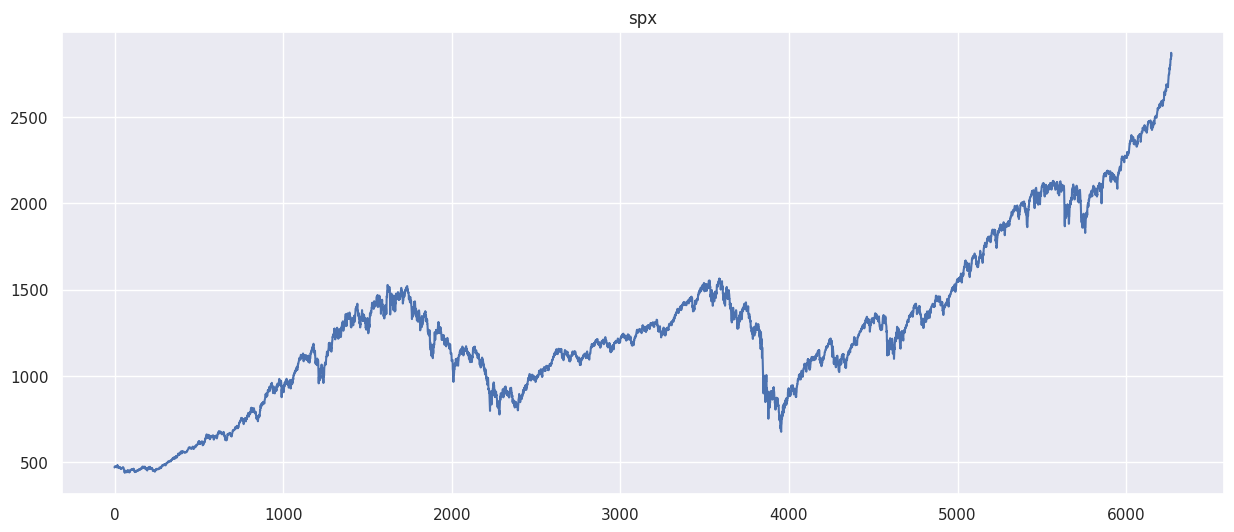

In [63]:
# Plot 'spx' data with the title 'spx'
df['spx'].plot(title='spx')
plt.show()

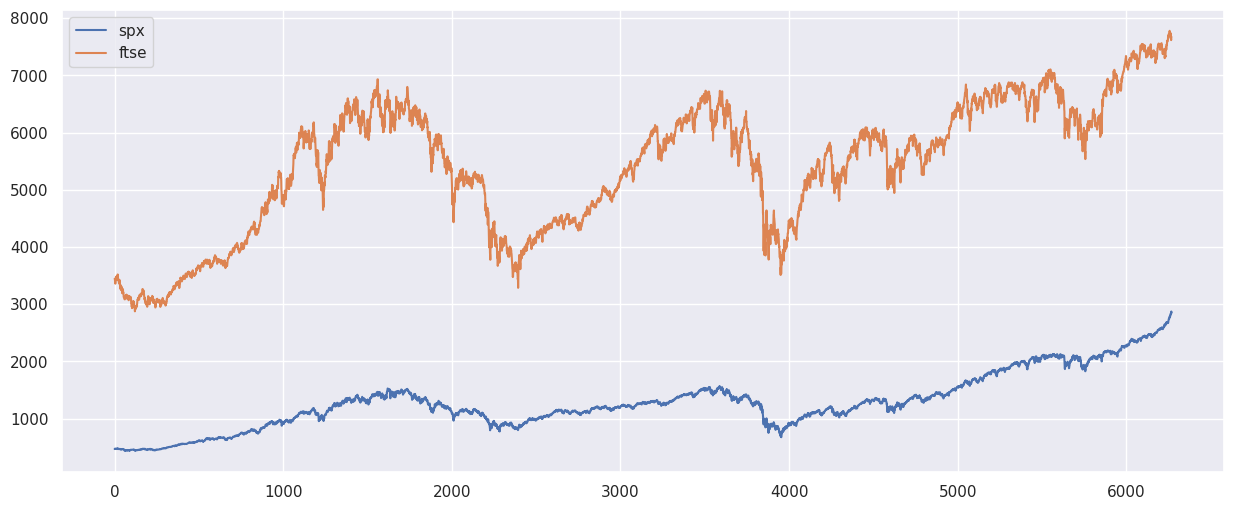

In [64]:
# Plot 'spx' and 'ftse' data with legends
df['spx'].plot()
df['ftse'].plot()
plt.legend()
plt.show()

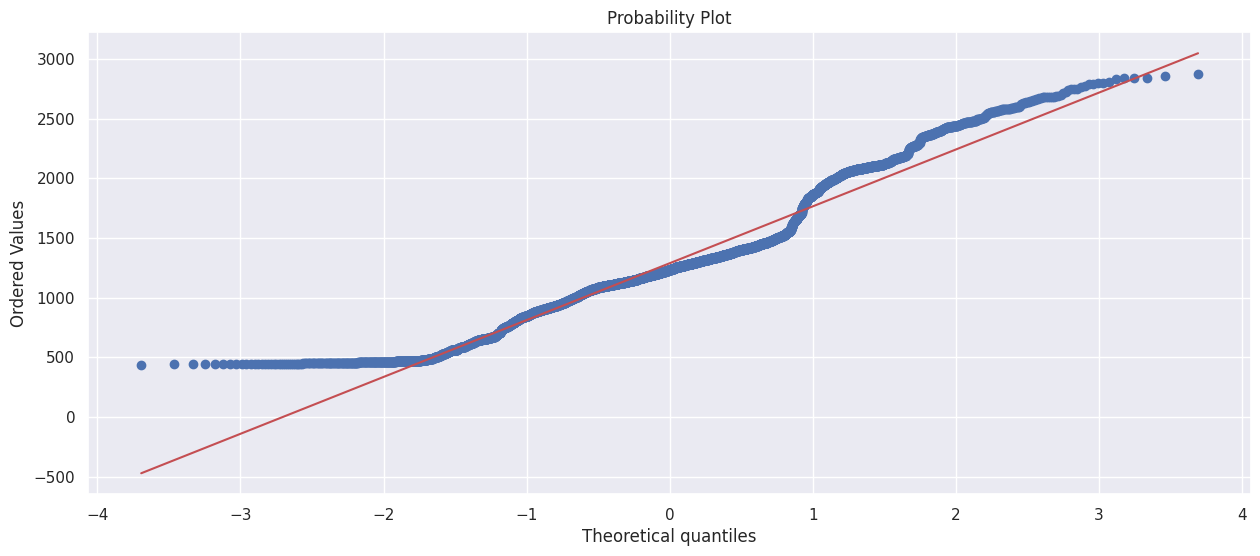

In [65]:
# Plot probability plot for 'spx' data
st.probplot(df['spx'], plot=pylab)
pylab.show()

In [66]:
# Display summary statistics of the DataFrame
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [67]:
# Convert the 'date' column to datetime format with day-first
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [68]:
# Set the 'date' column as the DataFrame index
df.set_index('date', inplace=True)

In [69]:
# Resample the DataFrame to 'B' (business day) frequency and calculate the mean
df = df.resample('B').mean()

In [70]:
# Fill missing values in 'spx', 'dax', 'ftse', and 'nikkei'
df['spx'] = df['spx'].fillna(method='ffill')
df['dax'] = df['dax'].fillna(method='bfill')
df['ftse'] = df['ftse'].fillna(method='ffill')
df['nikkei'] = df['nikkei'].fillna(method='ffill')

In [71]:
# Display the number of missing values
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [72]:
# Calculate the 80% size of the DataFrame
size = int(len(df) * 0.8)

In [73]:
# Augmented Dickey-Fuller test on 'nikkei' data
sts.adfuller(df['nikkei'])

(-1.332381058320324,
 0.6142308566436263,
 1,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 83856.80978763242)

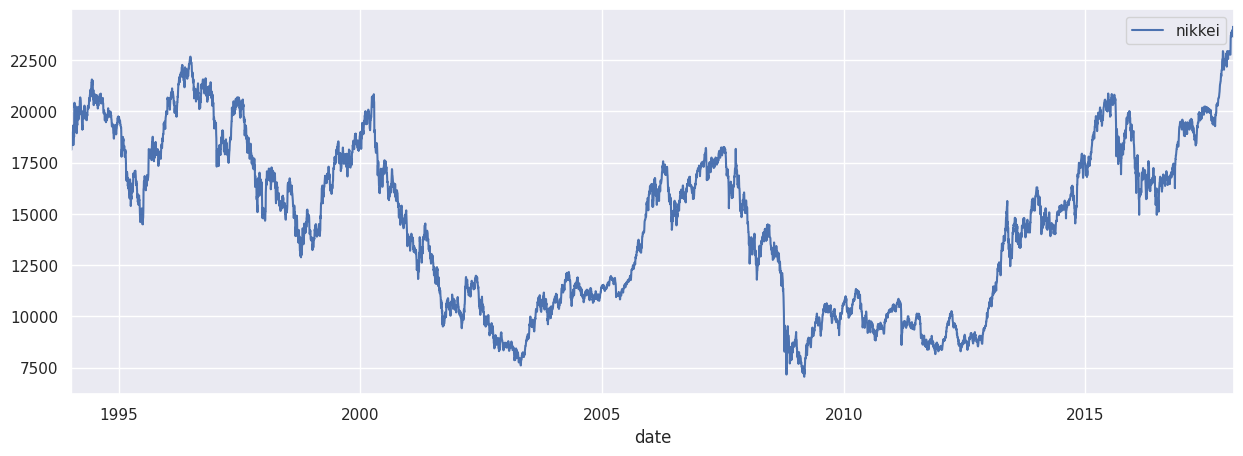

In [74]:
# Plot 'nikkei' data with a legend
df['nikkei'].plot(figsize=(15, 5))
plt.legend()
plt.show()

## Read white noise data
*  wn : white noise

In [75]:
# Read white noise data from '/content/wn.xlsx' into a DataFrame
wn = pd.read_excel('/content/wn.xlsx')
wn

,date,market_value,wn
0,1994-01-07,3445.98,5235.236719
1,1994-01-10,3440.58,6123.192045
2,1994-01-11,3413.77,5031.440408
3,1994-01-12,3372.02,4368.921095
4,1994-01-13,3360.01,6233.539989
...,...,...,...
5016,2013-04-01,6411.74,6795.772483
5017,2013-04-02,6490.66,2858.894363
5018,2013-04-03,6420.28,3727.670181
5019,2013-04-04,6344.11,4784.341770


In [76]:
# Augmented Dickey-Fuller test on 'wn' data
sts.adfuller(wn['wn'])

(-47.98661948857924,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 83248.26650290228)

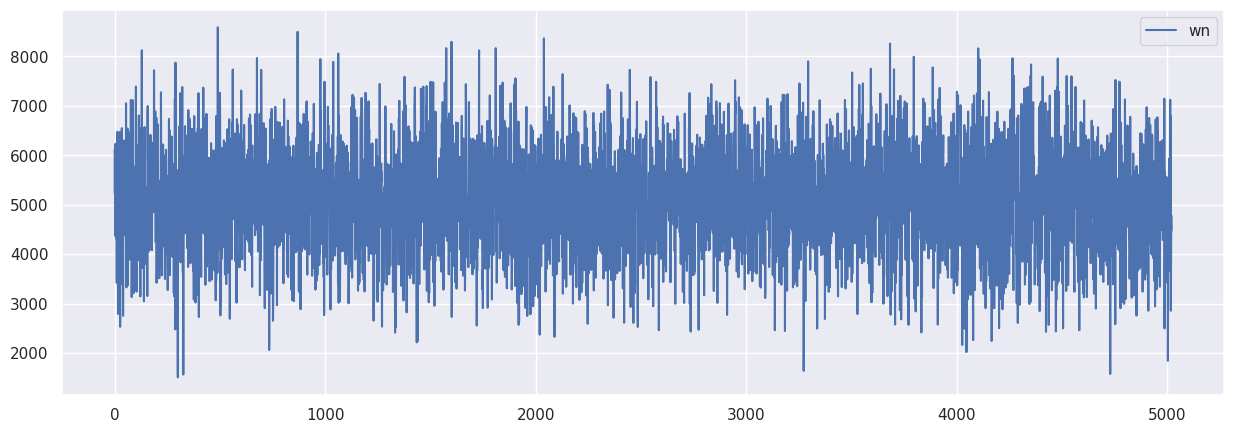

In [77]:
# Plot 'wn' data with a legend
wn['wn'].plot(figsize=(15, 5))
plt.legend()
plt.show()

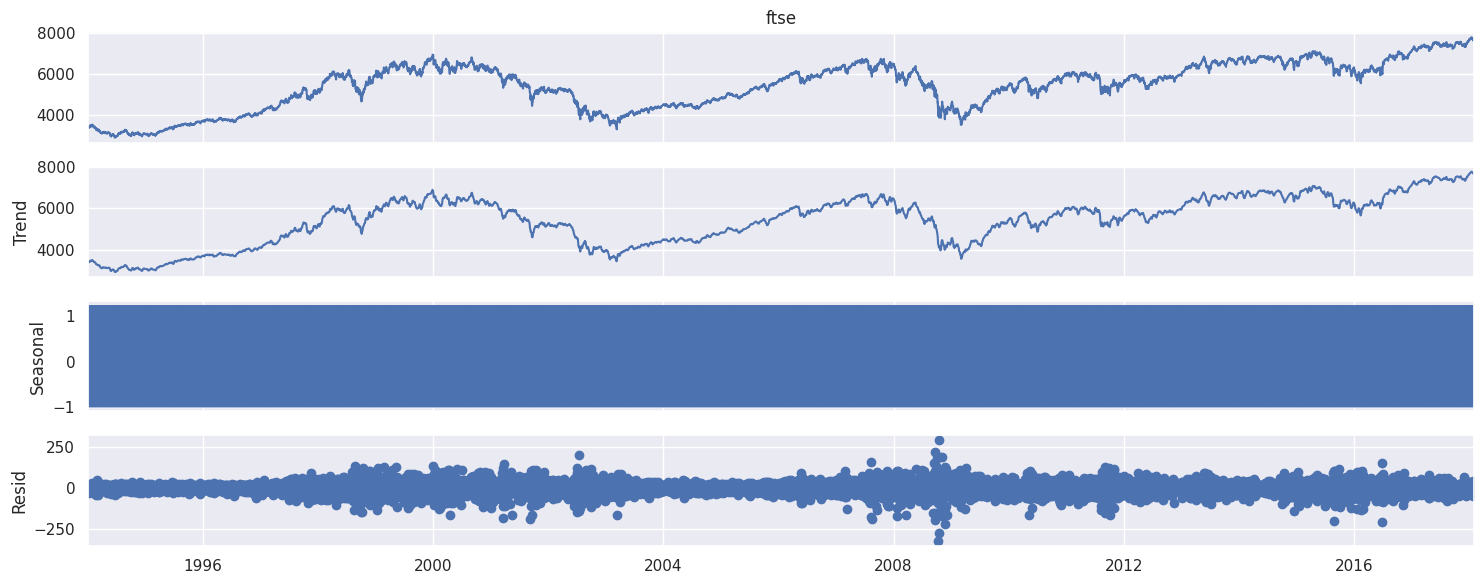

In [78]:
# Decompose 'ftse' data with an additive model and plot the components
s_dec_add = seasonal.seasonal_decompose(df['ftse'], model='additive')
s_dec_add.plot()
plt.show()

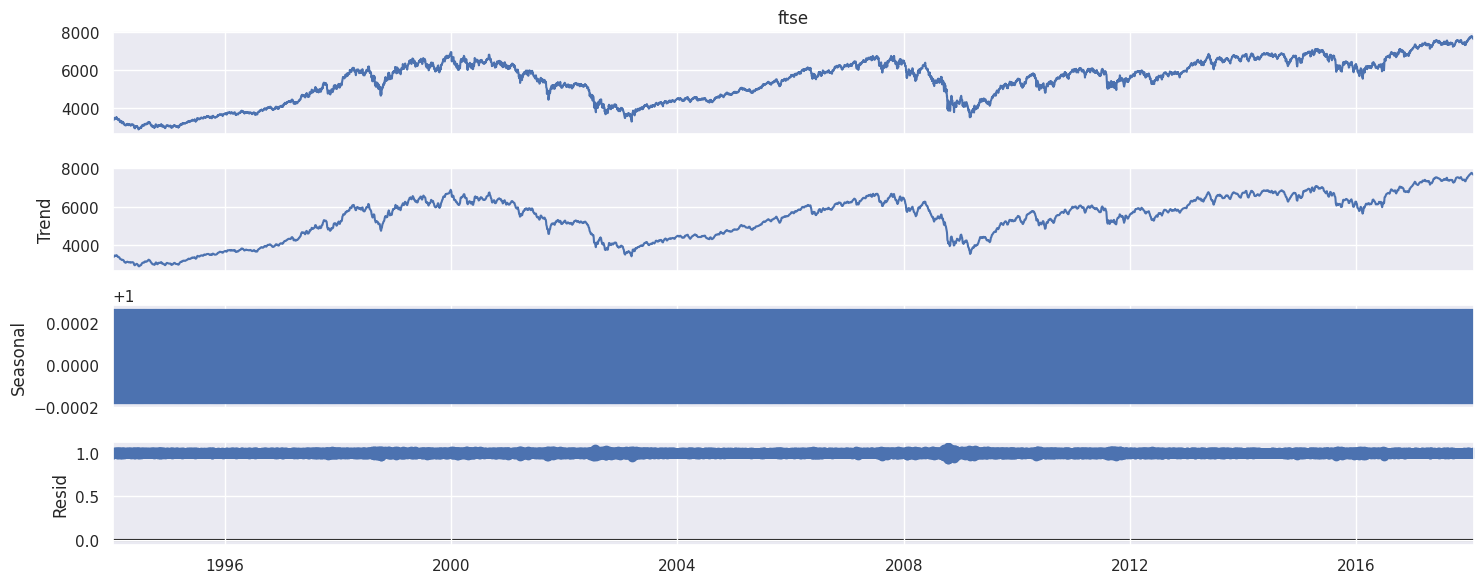

In [79]:
# Decompose 'ftse' data with a multiplicative model and plot the components
s_dec_mul = seasonal.seasonal_decompose(df['ftse'], model='multiplicative')
s_dec_mul.plot()
plt.show()

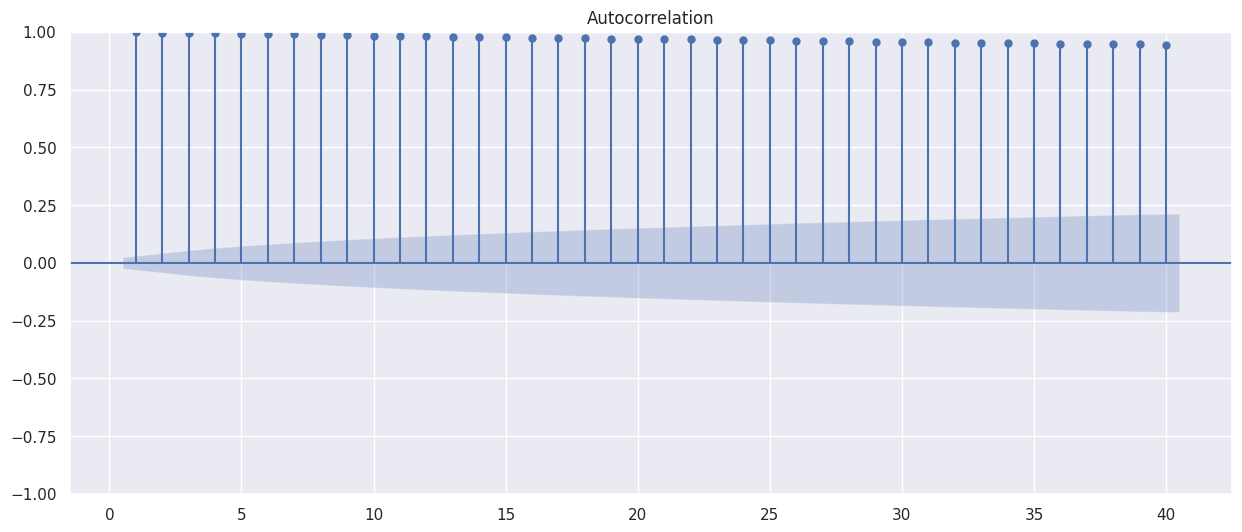

In [80]:
# Plot autocorrelation function (ACF) of 'ftse' data
sgt.plot_acf(df['ftse'], lags=40, zero=False)
plt.show()

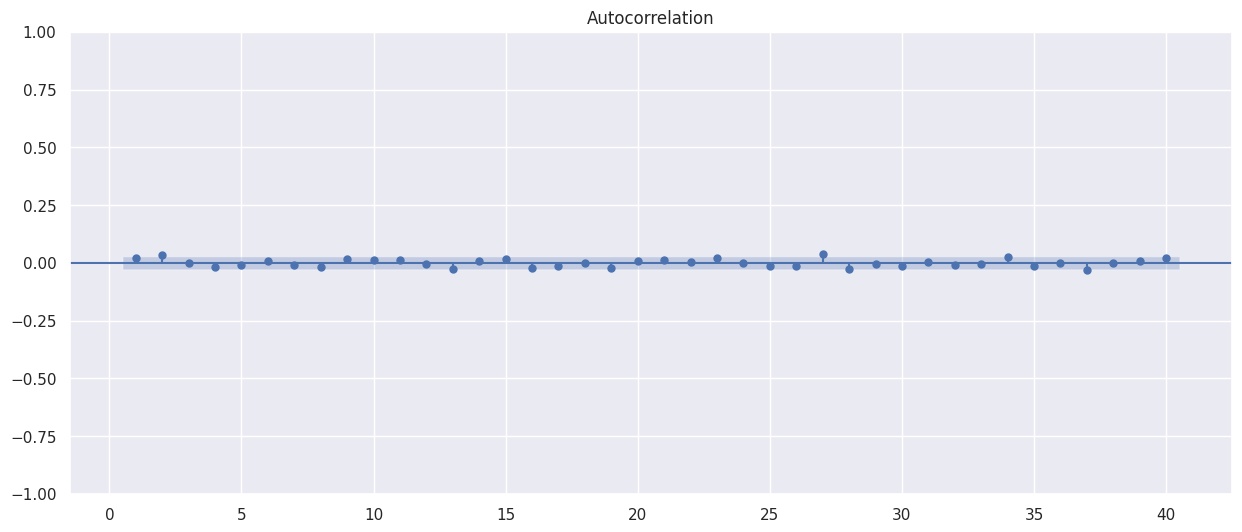

In [81]:
# Plot autocorrelation function (ACF) of 'wn' data
sgt.plot_acf(wn['wn'], lags=40, zero=False)
plt.show()

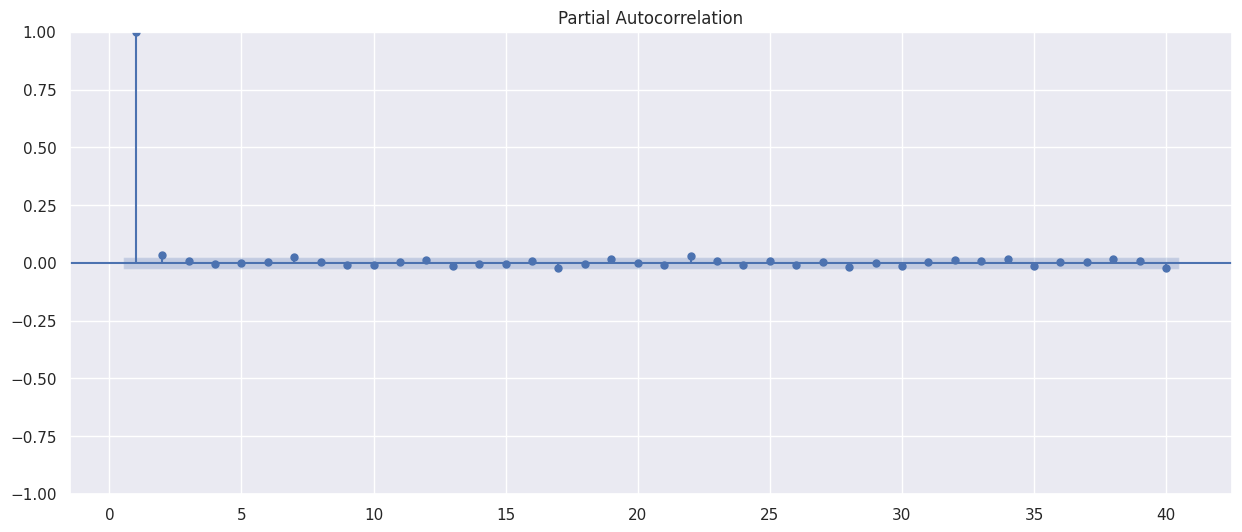

In [82]:
# Plot partial autocorrelation function (PACF) of 'nikkei' data
sgt.plot_pacf(df['nikkei'], lags=40, zero=False)
plt.show()

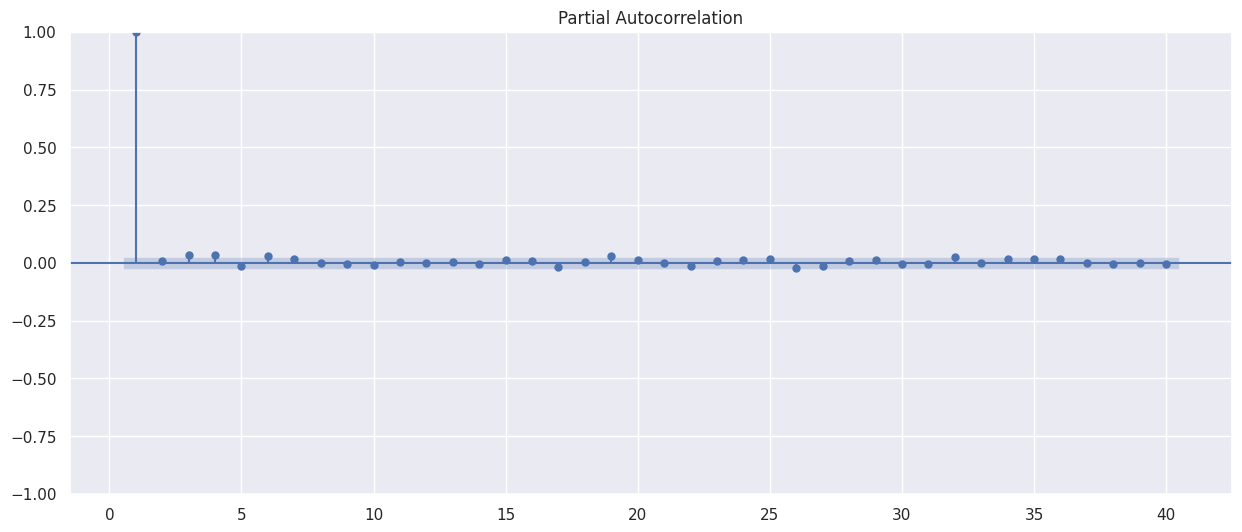

In [83]:
# Plot partial autocorrelation function (PACF) of 'ftse' data
sgt.plot_pacf(df['ftse'], lags=40, zero=False)
plt.show()

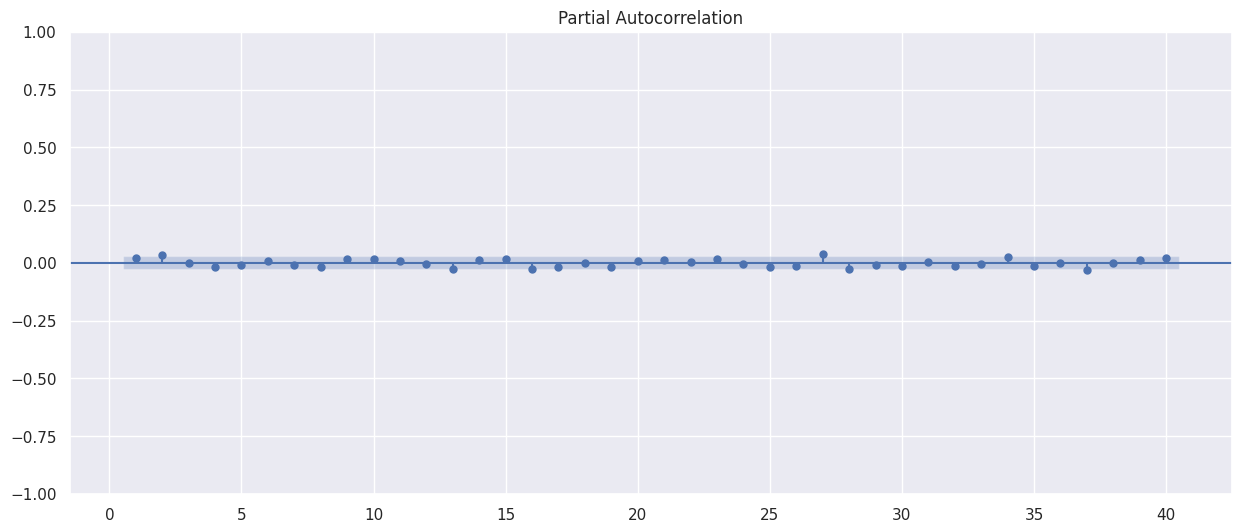

In [84]:
# Plot partial autocorrelation function (PACF) of 'wn' data
sgt.plot_pacf(wn['wn'], lags=40, zero=False)
plt.show()